In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/sales_data_with_discounts.csv')

In [ ]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
df.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


In [ ]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
display(numerical_cols)

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [ ]:
descriptive_stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Mode': df[numerical_cols].mode().iloc[0],
    'Standard Deviation': df[numerical_cols].std()
})

print(descriptive_stats)

                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


In [ ]:
"""
Breif Interpretation:
Volume:
The average volume sold is 5.07 units, with a median of 4 and a mode of 3. This indicates that smaller order sizes are more common, but some large orders raise the average, as shown by the standard deviation of 4.23.

Average Price:
The mean price is very high (₹10,453.43), while the median (₹1,450.00) and mode (₹400.00) are much lower. This large gap and high standard deviation (₹18,079.90) suggest a few very high-priced products are skewing the average.

Total Sales Value:
With a mean of ₹33,812.84 and a median of only ₹5,700.00, the data is clearly skewed by high-value transactions. The high standard deviation (₹50,535.07) confirms significant variability.

Discount Rate (%):
The average discount rate is 15.16%, with a median slightly higher at 16.58%. The low standard deviation (4.22%) suggests that discounting is fairly consistent across records.

Discount Amount:
The mean discount amount is ₹3,346.50, but the median is only ₹988.93. A high standard deviation (₹4,509.90) indicates that discount amounts vary widely, again likely due to varying product prices.

Net Sales Value:
Like total sales, net sales are highly skewed. The mean (₹30,466.34) is much higher than the median (₹4,677.79), and the large standard deviation (₹46,358.66) reflects wide variation in net transaction values.
"""


'\nVolume:\nThe average volume sold is 5.07 units, with a median of 4 and a mode of 3. This indicates that smaller order sizes are more common, but some large orders raise the average, as shown by the standard deviation of 4.23.\n\nAverage Price:\nThe mean price is very high (₹10,453.43), while the median (₹1,450.00) and mode (₹400.00) are much lower. This large gap and high standard deviation (₹18,079.90) suggest a few very high-priced products are skewing the average.\n\nTotal Sales Value:\nWith a mean of ₹33,812.84 and a median of only ₹5,700.00, the data is clearly skewed by high-value transactions. The high standard deviation (₹50,535.07) confirms significant variability.\n\nDiscount Rate (%):\nThe average discount rate is 15.16%, with a median slightly higher at 16.58%. The low standard deviation (4.22%) suggests that discounting is fairly consistent across records.\n\nDiscount Amount:\nThe mean discount amount is ₹3,346.50, but the median is only ₹988.93. A high standard deviati

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
display(categorical_cols)

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

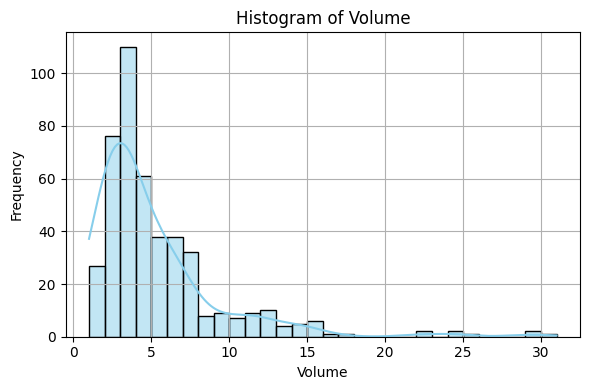

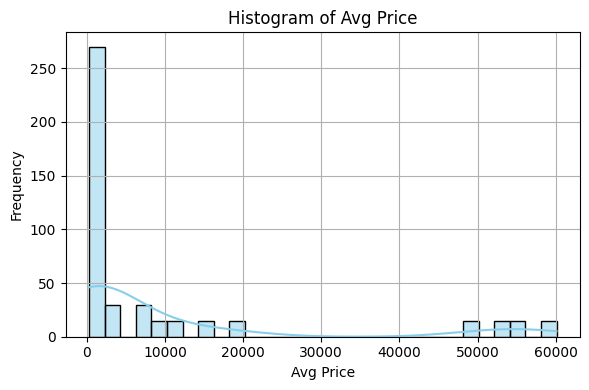

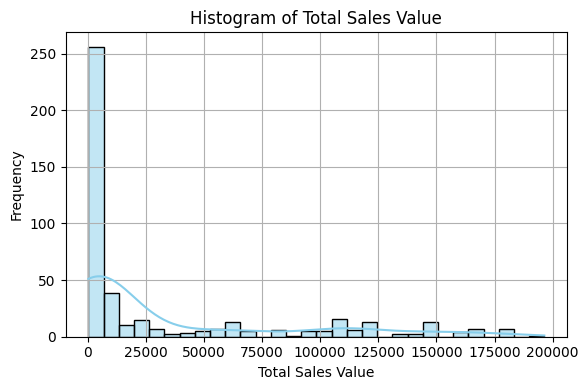

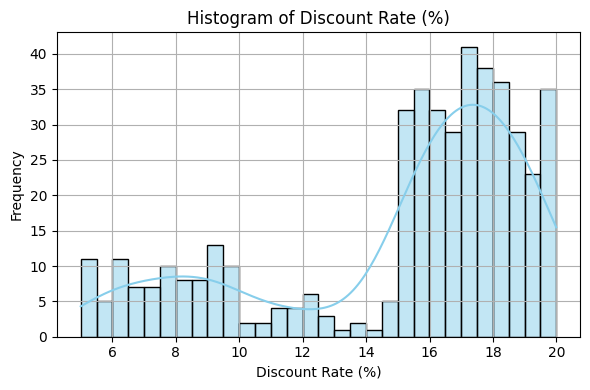

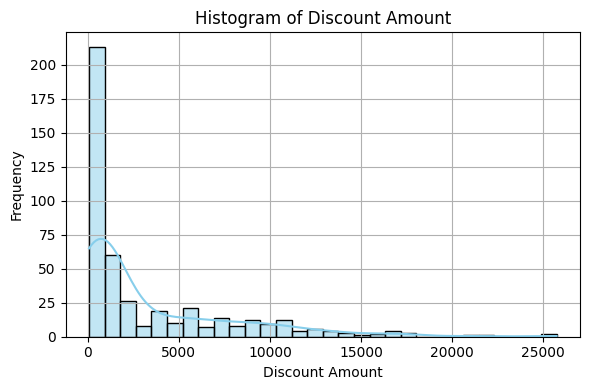

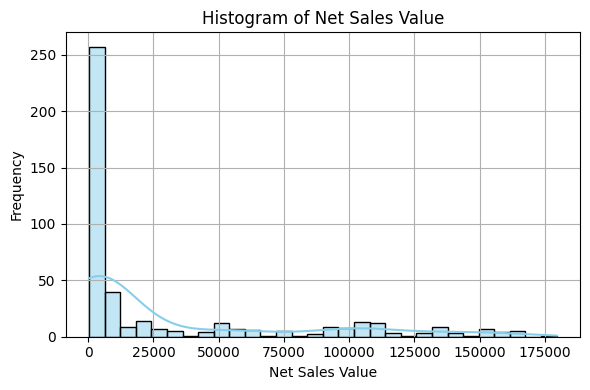

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
"""
Details of the Histograms:
Histogram of Volume
Distribution: Right-skewed (positive skew). The majority of data points are concentrated at the lower volume values, with a tail extending towards higher volumes.
Outliers: Presence of outliers at higher volume values (e.g., beyond 10).
Inference: Most transactions or observations occur at low volume levels, with few instances of very high volumes.

Histogram of Avg Price
Distribution: Right-skewed, sharply decreasing as prices increase.
Outliers: Some high-price outliers beyond typical ranges.
Inference: Average prices mostly cluster at lower values, with fewer transactions at very high prices.

Histogram of Total Sales Value
Distribution: Right-skewed, with most sales values concentrated at lower ranges.
Outliers: Presence of high outliers at the upper end.
Inference: The majority of sales have relatively low total sales value, with a few very large sales pulling the tail.

Histogram of Discount Rate (%)
Distribution: Slight right skew, with a peak around 16–20%. Some distribution spread at lower discount rates.
Outliers: Few observations with very high discount rates.
Inference: Most discounts are around 16–20%, indicating a common discount range.

Histogram of Discount Amount
Distribution: Highly right-skewed, with most discount amounts at the lower end.
Outliers: A few very high discount amounts are evident.
Inference: Typical discounts are small, but occasionally large discounts occur.

Histogram of Net Sales Value
Distribution: Right-skewed, with most net sales values clustered at the lower range.
Outliers: Presence of outliers at high net sales values.
Inference: Most transactions result in low net sales, with some very large net sales figures.

Overall Summary:
All variables exhibit positive skewness, indicating that most data points are concentrated at lower values, with a long tail towards higher values.
Presence of outliers across variables suggests variability, especially with large sales or discount amounts.
These distributions imply that typical transactions tend to have smaller volumes, prices, and discounts, but occasional high-value or high-discount transactions occur.
"""

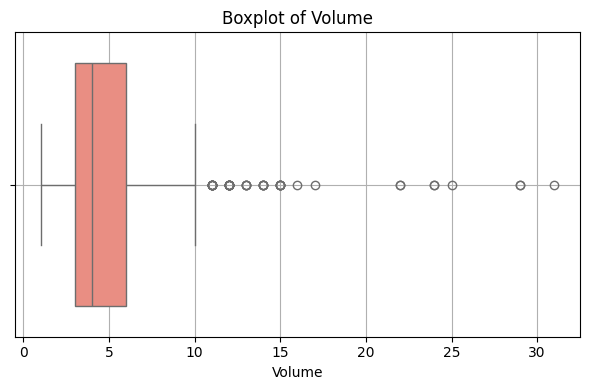

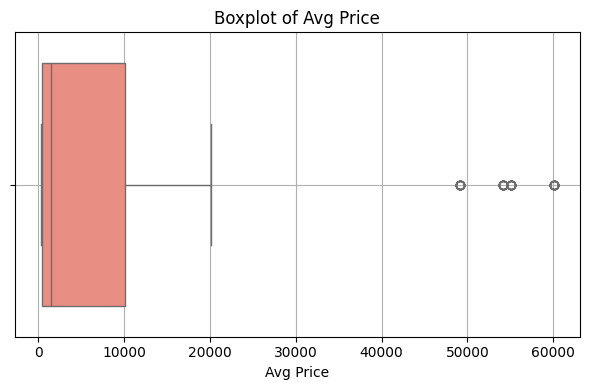

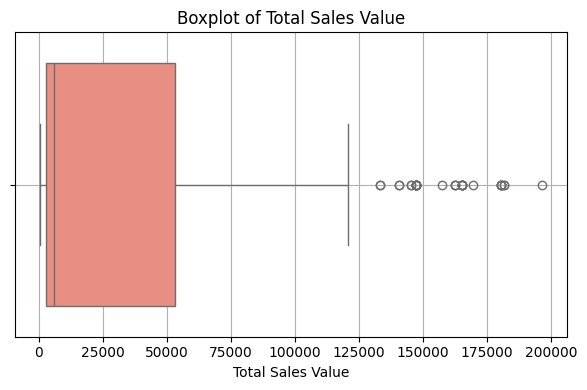

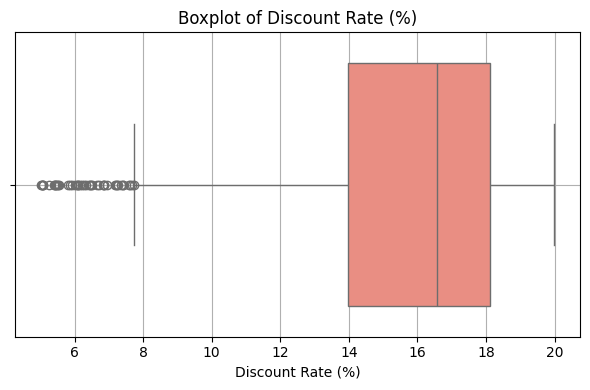

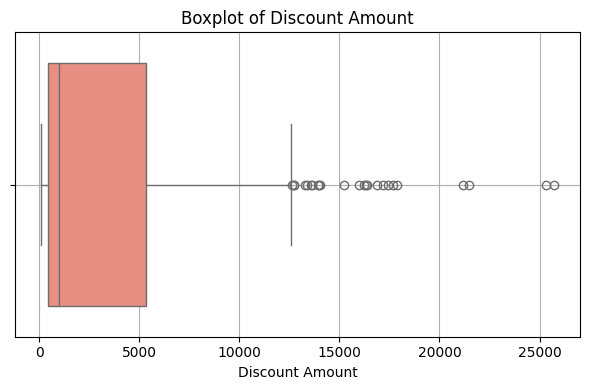

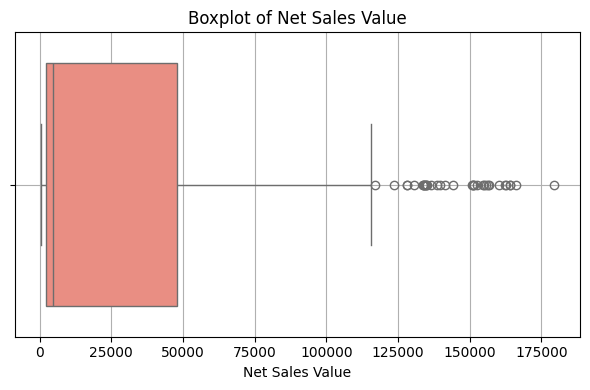

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
"""
Details of the Boxplots:
Boxplot of Volume
Findings: The majority of data points are clustered at lower values, with a few extreme high values (outliers) indicated by points beyond the whiskers.
Unusual distribution: Large outliers suggest that some transactions involve very high volumes, which are rare compared to typical activities.

Boxplot of Avg Price
Findings: Most data is concentrated at lower average prices, with a few high-price outliers.
Unusual distribution: Significant outliers at high prices show some transactions involve very expensive items or services.

Boxplot of Total Sales Value
Findings: Mainly low sales values, with a few very large sales amounts as outliers.
Unusual distribution: The large outliers indicate rare, high-value sales that skew the data.

Boxplot of Discount Rate (%)
Findings: Most discount rates are around 16%, but there are outliers with significantly lower or higher discount percentages.
Unusual distribution: Outliers at both ends suggest some discounts are unusually small or large compared to typical rates.

Boxplot of Discount Amount
Findings: The typical discounts are small, with some outliers at very high discount amounts.
Unusual distribution: Rare large discounts could be promotional or special case transactions.
Boxplot of Net Sales Value

Findings: Most net sales are low, with some large outliers in the high range.
Unusual distribution: High net sales amounts are outliers, indicating few transactions with exceptionally high net value.

"""

SyntaxError: incomplete input (ipython-input-6-969763094.py, line 1)

/tmp/ipython-input-24-374843379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


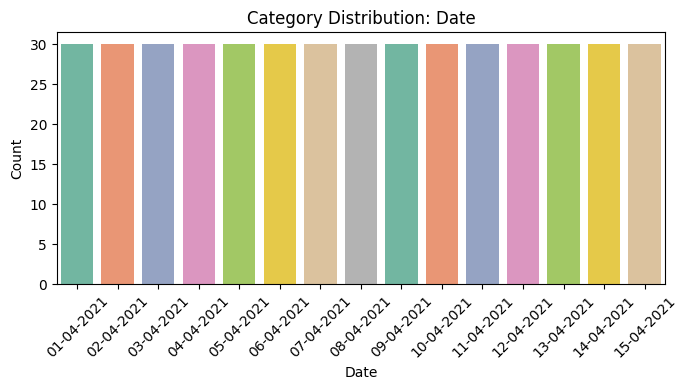

/tmp/ipython-input-24-374843379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


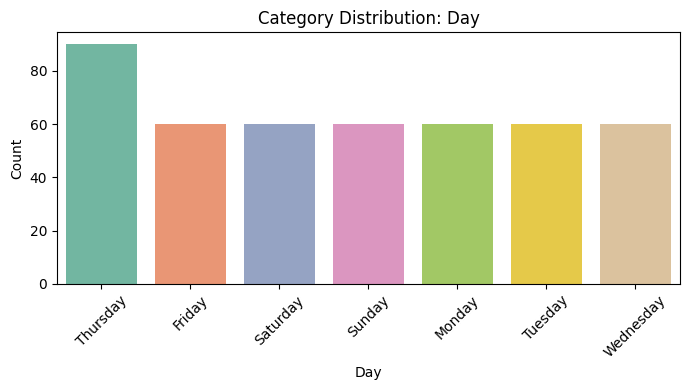

/tmp/ipython-input-24-374843379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


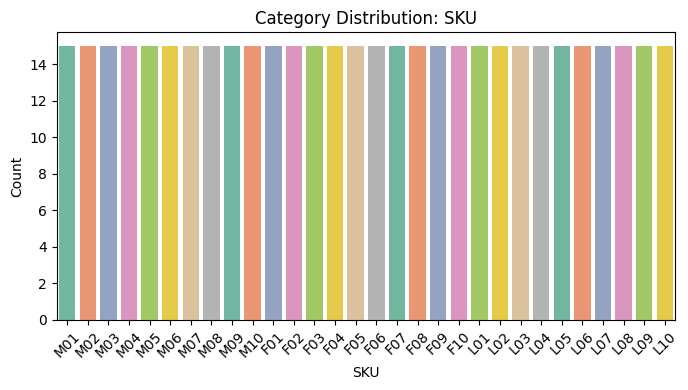

/tmp/ipython-input-24-374843379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


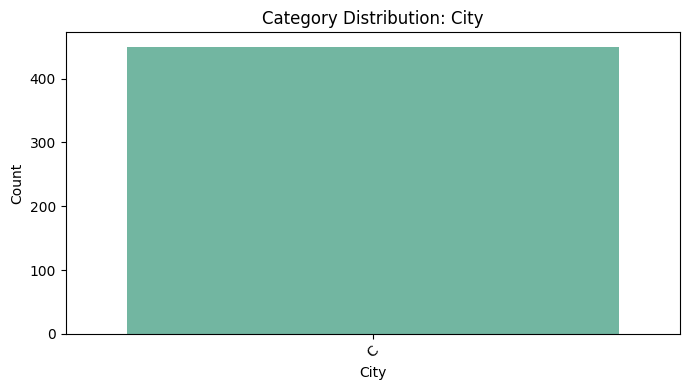

/tmp/ipython-input-24-374843379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


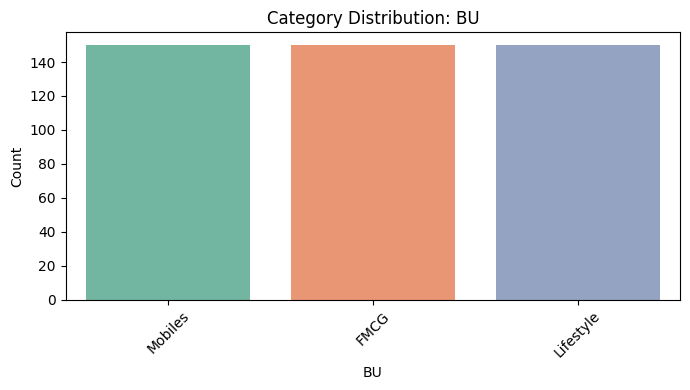

/tmp/ipython-input-24-374843379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


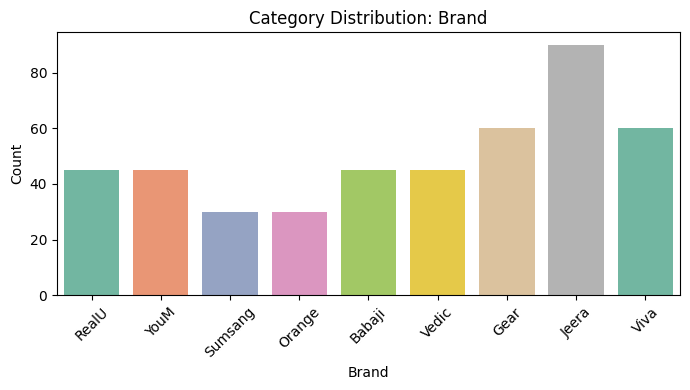

/tmp/ipython-input-24-374843379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


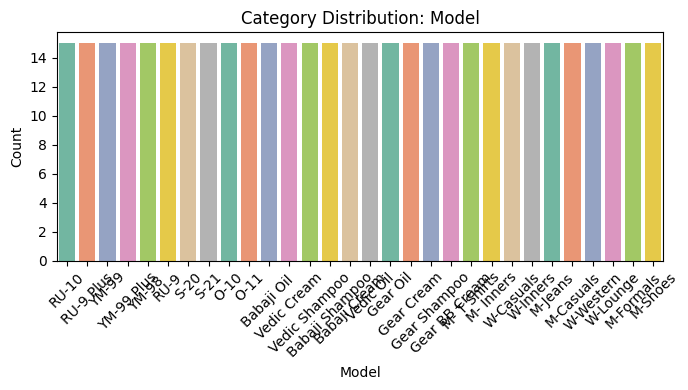

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Category Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
"""
All bars are equal in height, indicating a uniform distribution
Thursday has a significantly higher count (~90+), while all other days (Friday to Wednesday) have equal counts (~60).
All SKUs (Stock Keeping Units) have equal counts (~15 each).
Only one city ("C") is present, with the full dataset (count ~450+) attributed to it.
Mobiles, FMCG, and Lifestyle all have equal representation (~150 records each).
All models have equal count (~15 each).

"""

In [ ]:
"""
details of box plot:
Peak activity on Thursdays suggests day-specific trends.

The geographic concentration in a single city indicates a localized market focus.

Product distribution is uniform across SKUs, but brand popularity varies, with some brands significantly more prevalent.

The even spread over dates shows steady activity, with no major fluctuations during the observed period.

Distribution: The counts are very similar across all models, with each model having approximately the same number of occurrences (~15).
"""

In [ ]:
"""
Standardization (Z-score normalization) transforms each value based on its distance from the mean and how spread out the data is:

z = 𝑥 - 𝜇 / 𝜎
𝑥
x = original value
𝜇
μ = mean of the column
𝜎
σ = standard deviation of the column
𝑧
z = standardized value

After transformation:

The mean of the column becomes 0

The standard deviation becomes 1
"""

SyntaxError: incomplete input (ipython-input-969763094.py, line 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
print(num_cols)

['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [ ]:
print("Before Standardization:\n", df[num_cols].describe())

Before Standardization:
            Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427 

In [ ]:
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])
print("\nAfter Standardization:\n", df_standardized[num_cols].describe())


After Standardization:
              Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  4.500000e+02  4.500000e+02       4.500000e+02       4.500000e+02   
mean   6.118562e-17  3.157968e-17       1.578984e-17      -3.552714e-17   
std    1.001113e+00  1.001113e+00       1.001113e+00       1.001113e+00   
min   -9.620925e-01 -5.627654e-01      -6.619170e-01      -2.406935e+00   
25%   -4.889322e-01 -5.530754e-01      -6.163534e-01      -2.823066e-01   
50%   -2.523521e-01 -4.985344e-01      -5.569226e-01       3.374180e-01   
75%    2.208081e-01 -1.957016e-02       3.840648e-01       7.019781e-01   
max    6.135311e+00  2.749009e+00       3.220894e+00       1.147360e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -5.526444e-17     1.973730e-17  
std       1.001113e+00     1.001113e+00  
min      -7.275032e-01    -6.508581e-01  
25%      -6.406462e-01    -6.103625e-01  
50%      -5.233349e-01    -5.569025e-01  
75%  

In [ ]:
comparison = pd.concat([df[num_cols], df_standardized[num_cols].add_suffix('_zscore')], axis=1)
print("\nComparison:\n", comparison.head())


Comparison:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Volume_zscore  Avg Price_zscore  Total Sales Value_zscore  \
0    160346.501180       2.350029          0.091173                  2.925721   
1     89323.897039       1.167129         -0.019570                  1.330995   
2    102042.089843       0.457388          0.312659                  1.562775   
3    112235.925298       0.220808          0.534146                  1.719276   
4     19927.053770      -0.488932         -0.130313                 -0.188452   

   Discount Rate (%)_zsc

In [ ]:
"""
one-hot Encoding
Converted all categorical variables into numeric binary format

"""
categorical_cols = ['Day', 'SKU', 'BU', 'Brand', 'Model']

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)
print(df_encoded.head())

         Date City  Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0  01-04-2021    C      15      12100             181500          11.654820   
1  01-04-2021    C      10      10100             101000          11.560498   
2  01-04-2021    C       7      16100             112700           9.456886   
3  01-04-2021    C       6      20100             120600           6.935385   
4  01-04-2021    C       3       8100              24300          17.995663   

   Discount Amount  Net Sales Value  Day_Friday  Day_Monday  ...  \
0     21153.498820    160346.501180       False       False  ...   
1     11676.102961     89323.897039       False       False  ...   
2     10657.910157    102042.089843       False       False  ...   
3      8364.074702    112235.925298       False       False  ...   
4      4372.946230     19927.053770       False       False  ...   

   Model_Vedic Cream  Model_Vedic Oil  Model_Vedic Shampoo  Model_W-Casuals  \
0              False            False